# EMBEDDED METHODS - LINEAR MODELS

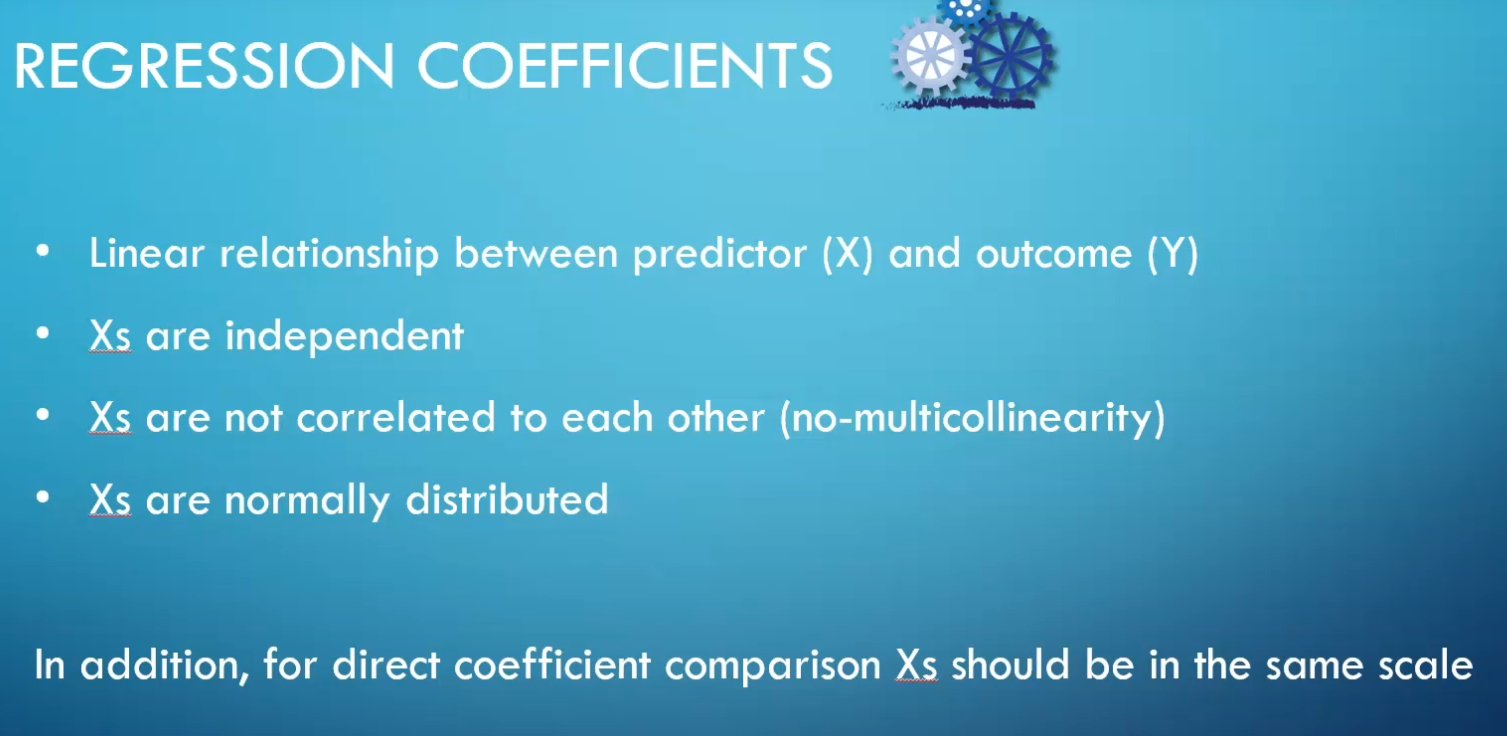

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel

In [ ]:
data= pd.read_csv(r'C:\Users\VigneshSS\Desktop\Feature Selection for Machine Learning\precleaned-datasets\dataset_2.csv')
data.head()

In [ ]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

In [ ]:
# we will scale the variables, so we fit a scaler

scaler = StandardScaler()
scaler.fit(X_train)

In [ ]:
# set C to 1000, to avoid regularisation
sel_ = SelectFromModel(
    LogisticRegression(C=1000, penalty='l2', max_iter=300, random_state=10))

sel_.fit(scaler.transform(X_train), y_train)

In [ ]:
sel_.get_support()

In [ ]:
selected_feat = X_train.columns[(sel_.get_support())]
len(selected_feat)

In [ ]:

sel_.estimator_.coef_

In [ ]:
# as SelectFromModel selects coefficients above the mean
# of all coefficients, let's calculate first the mean

sel_.estimator_.coef_.mean()

In [ ]:
# and now let's plot the distribution of coefficients

pd.Series(sel_.estimator_.coef_.ravel()).hist(bins=20)
plt.xlabel('Coefficients')
plt.ylabel('Number of variables')
plt.show()

In [ ]:
# the feature importance is informed by the absolute value of
# the coefficient, and not the sign.
# therefore, let's recalculate the mean using the absolute values instead

np.abs(sel_.estimator_.coef_).mean()

In [ ]:
# and now let's plot the histogram of absolute coefficients

pd.Series(np.abs(sel_.estimator_.coef_).ravel()).hist(bins=20)
plt.xlabel('Coefficients')
plt.ylabel('Number of variables')
plt.show()

In [ ]:
# and now, let's compare the  number of selected features
# with the number of features which coefficient is above the
# mean coefficient, to make sure we understand the output of
# SelectFromModel

print('total features: {}'.format((X_train.shape[1])))

print('selected features: {}'.format(len(selected_feat)))

print(
    'features with coefficients greater than the mean coefficient: {}'.format(
        np.sum(
            np.abs(sel_.estimator_.coef_) > np.abs(
                sel_.estimator_.coef_).mean())))

# LInear Regression

In [ ]:
data= pd.read_csv(r'C:\Users\VigneshSS\Desktop\Feature Selection for Machine Learning\precleaned-datasets\train(1).csv')
data.head()

In [ ]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

In [ ]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

In [ ]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [ ]:
sel_ = SelectFromModel(LinearRegression())

sel_.fit(scaler.transform(X_train), y_train)

In [ ]:
# let's count the number of variables selected
selected_feat = X_train.columns[(sel_.get_support())]

len(selected_feat)

In [ ]:
# and now let's plot the histogram of absolute coefficients

pd.Series(np.abs(sel_.estimator_.coef_).ravel()).hist(bins=10)
plt.xlabel('Coefficients')
plt.ylabel('Number of variables')
plt.show()

In [ ]:

print('total features: {}'.format((X_train.shape[1])))

print('selected features: {}'.format(len(selected_feat)))

print(
    'features with coefficients greater than the mean coefficient: {}'.format(
        np.sum(
            np.abs(sel_.estimator_.coef_) > np.abs(
                sel_.estimator_.coef_).mean())))

## Regression Coefficients are affected by regularisation

As I mentioned previously, regularisation applies a penalty on the coefficients, in order to reduce their influence and create models that generalise better. This is very good to improve  model performance. However, it masks the true relationship between the predictor X and the outcome Y. Let's explore why.

In [ ]:
data= pd.read_csv(r'C:\Users\VigneshSS\Desktop\Feature Selection for Machine Learning\precleaned-datasets\dataset_2.csv')
data.head()

In [ ]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

# we train 4 different models, decreasing the amount
# of regularisation (that is, increasing C)

# here we will store the coefficients of the variables
# fitted for each different model
coefs_df = []

# we train 4 different models with regularization
penalties = [0.00005, 0.0005, 0.005, 0.05, 0.5]

for c in penalties:   
    
    logit = LogisticRegression(C=c, penalty='l2', random_state=10, max_iter=300)
    logit.fit(scaler.transform(X_train), y_train)
    
    # store the coefficients of the variables in a list
    coefs_df.append(pd.Series(logit.coef_.ravel()))

In [ ]:
# now I create a dataframe with the coefficients for all
# the variables for the 4 different logistic regression models

coefs = pd.concat(coefs_df, axis=1)
coefs.columns = penalties
coefs.index = X_train.columns
coefs.head()

In [ ]:
# apply log scale to the penalties (simplifies comparison)

coefs.columns = np.log(penalties)
coefs.head()

In [ ]:
# plot the change in coefficients with the penalty
coefs.T.plot(figsize=(15,10), legend=False)
plt.xlabel('Penalty value')
plt.ylabel('Coefficient')
plt.title('Coefficient value vs penalty. Each line corresponds to one variable')

In [ ]:
# now I will plot only the first 10 features for better
# visualisation

temp = coefs.head(10)
temp = temp.T
temp.plot(figsize=(12,8))
plt.xlabel('Penalty value')
plt.ylabel('Coefficient')
plt.title('Coefficient value vs penalty')

In [ ]:
# plot another 10 features for visualisation
temp = coefs.tail(10)
temp = temp.T
temp.plot(figsize=(12,8))
plt.xlabel('Penalty value')
plt.ylabel('Coefficient')
plt.title('Coefficient value vs penalty')

# Embedded methods – Lasso Regularisation

***Lasso is used in featureselection***
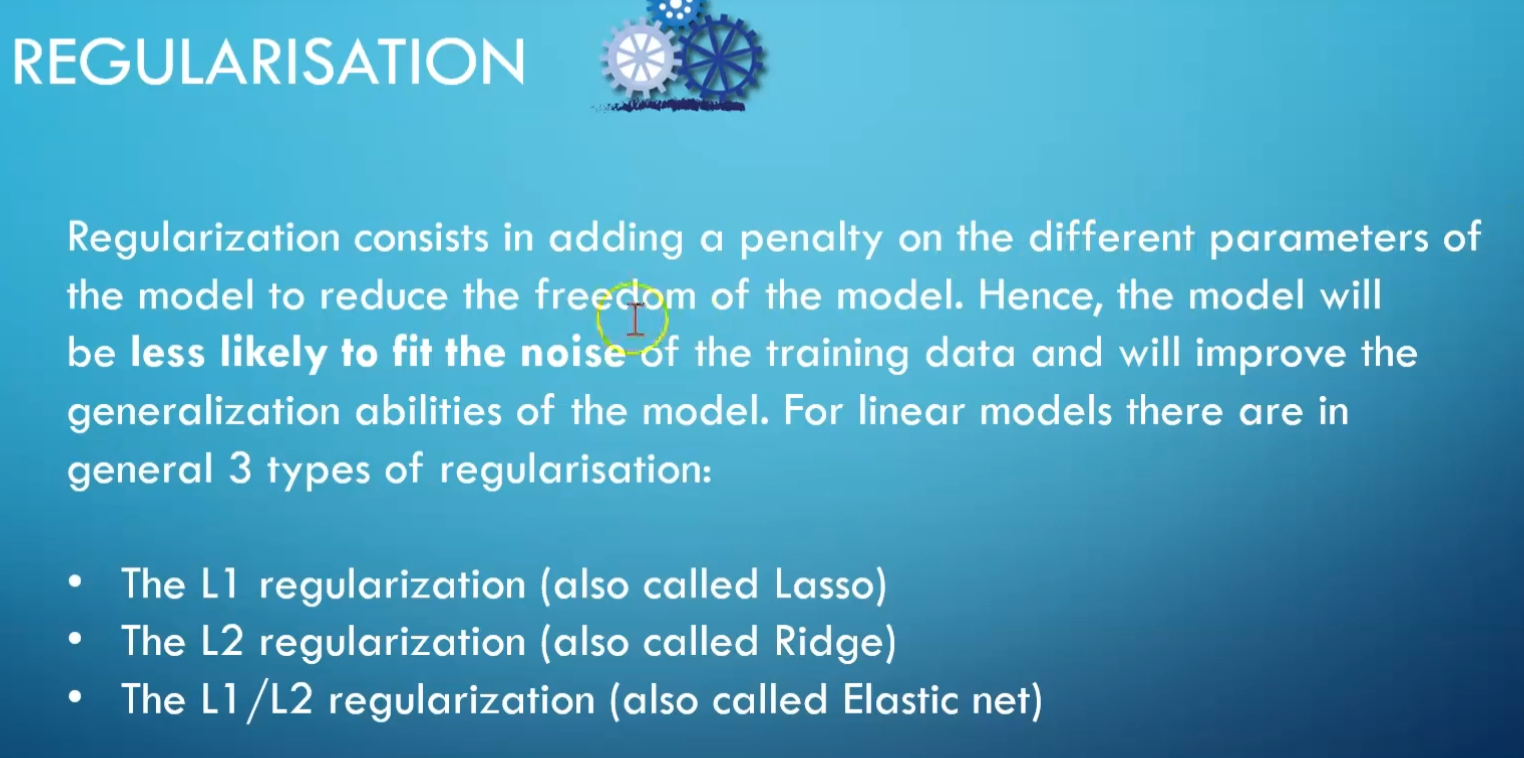

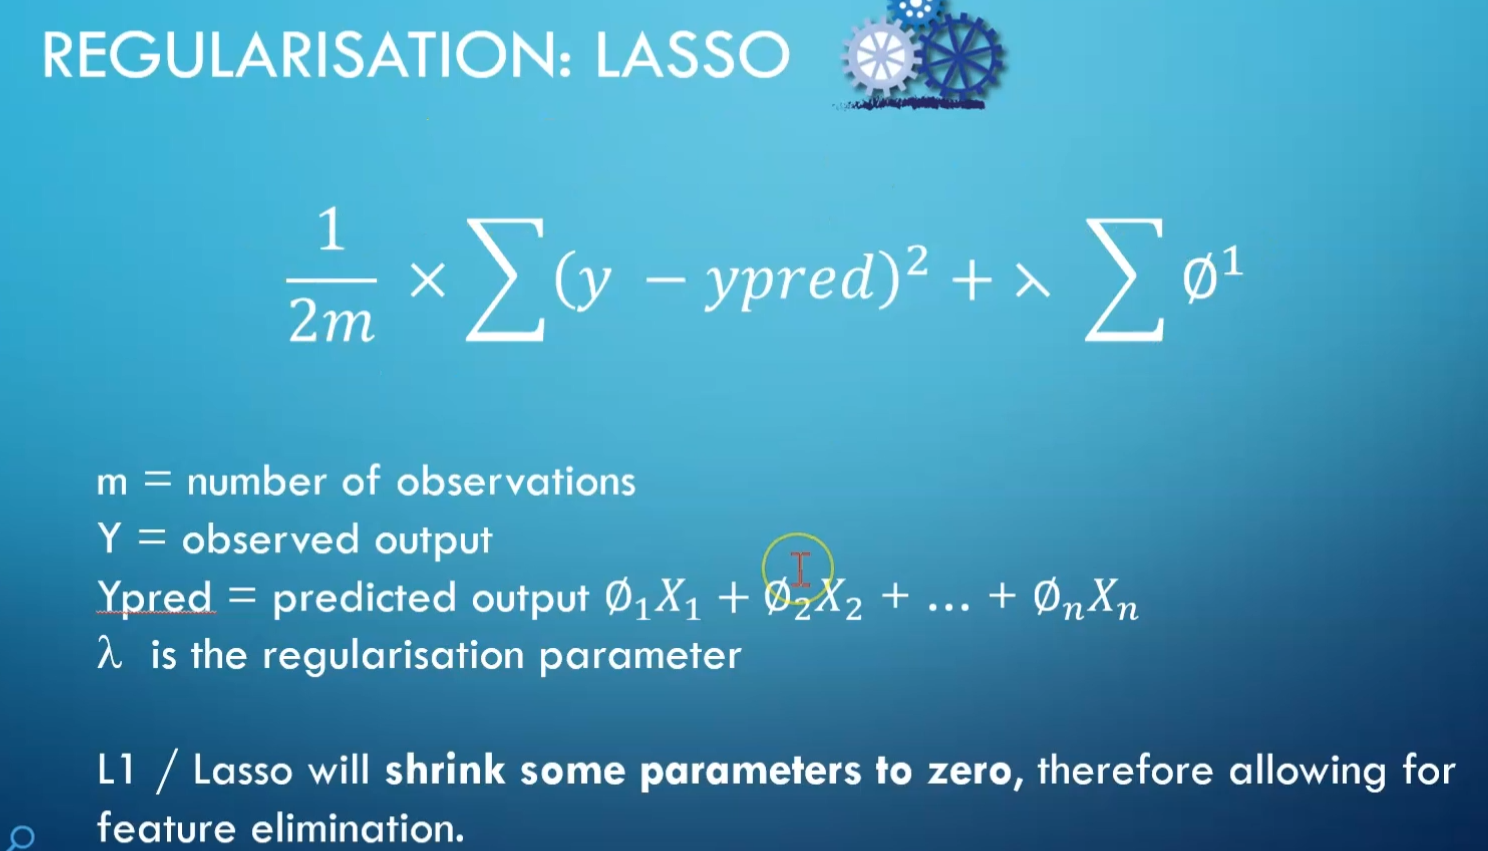

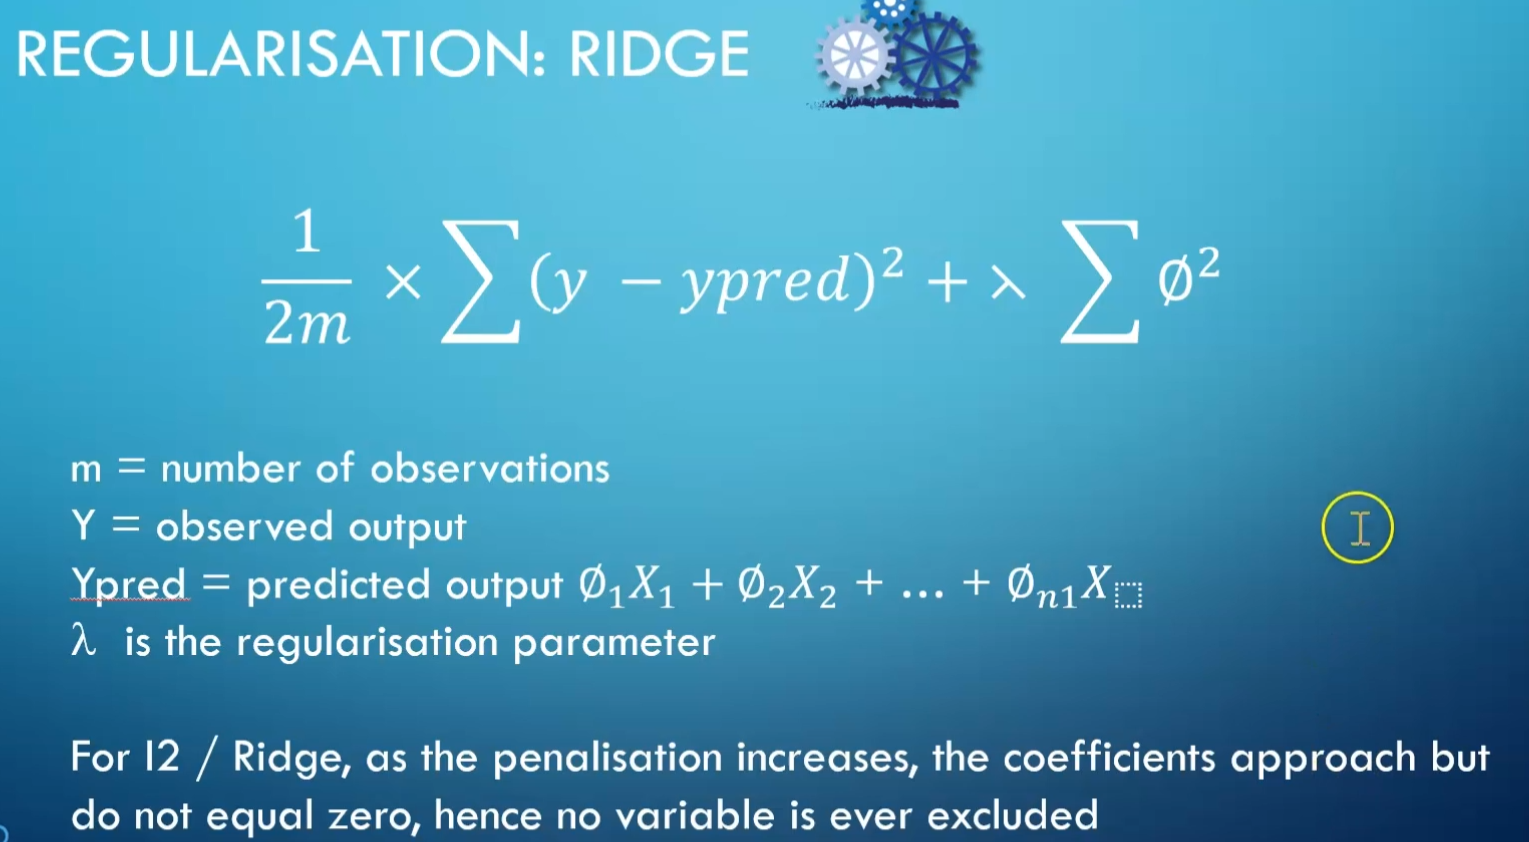

In [1]:

from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [ ]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

In [ ]:
# linear models benefit from feature scaling

scaler = StandardScaler()
scaler.fit(X_train)

### Select features with Lasso

In [ ]:
# here I will do the model fitting and feature selection
# altogether in one line of code

# first I specify the Logistic Regression model, and I
# make sure I select the Lasso (l1) penalty.

# Then I use the selectFromModel class from sklearn, which
# will select the features which coefficients are non-zero

sel_ = SelectFromModel(
    LogisticRegression(C=0.5, penalty='l1', solver='liblinear', random_state=10))

sel_.fit(scaler.transform(X_train), y_train)

In [ ]:
# this command let's me visualise the index of the
# features that were selected

sel_.get_support()

In [ ]:
# Now I make a list with the selected features
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

### Examine coefficients that shrank to zero

In [ ]:
# the number of features which coefficient was shrank to zero:
np.sum(sel_.estimator_.coef_ == 0)

In [ ]:
# we can identify the removed features like this:

removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

In [ ]:
# we can then remove the features from the training and testing set
# like this:

X_train_selected = sel_.transform(X_train)
X_test_selected = sel_.transform(X_test)

X_train_selected.shape, X_test_selected.shape

Remember that sklearn SelectFromModel returns a NumPy array, so if you need a dataframe, you need to capture the feature names first and then convert the array to a dataframe.

### Ridge regularisation does not shrink coefficients to zero

For the sake of the demo, let's inspect if the Ridge Regularization or L2 shrinks coefficients to zero.

In [ ]:
# For comparison, I will fit a logistic regression with a
# Ridge regularisation, and evaluate the coefficients

l1_logit = LogisticRegression(C=0.5, penalty='l2', max_iter=300, random_state=10)
l1_logit.fit(scaler.transform(X_train), y_train)

# I count the number of coefficients with zero values
# and it is zero, as expected
np.sum(l1_logit.coef_ == 0)

## Regression

In [ ]:
# load dataset

data = pd.read_csv('../houseprice.csv')
data.shape

In [ ]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

In [ ]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

In [ ]:
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

In [ ]:
# the features in the house dataset are in very
# different scales, so it helps the regression to scale
# them

scaler = StandardScaler()
scaler.fit(X_train)

### Select Coefficients with Lasso

In [ ]:
# here, again I will train a Lasso Linear regression and select
# the non zero features in one line.

# bear in mind that the linear regression object from sklearn does
# not allow for regularisation. So If you want to make a regularised
# linear regression you need to import specifically "Lasso"

# alpha is the penalisation, so I set it high
# to force the algorithm to shrink some coefficients

sel_ = SelectFromModel(Lasso(alpha=100, random_state=10))
sel_.fit(scaler.transform(X_train), y_train)

In [ ]:
sel_.get_support()

In [ ]:
# make a list with the selected features and print the outputs
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

As we can see, both for linear and logistic regression we used the Lasso regularisation to remove non-important features from the dataset. 

Keep in mind that increasing the penalisation will increase the number of features removed. Therefore, you will need to keep an eye and monitor the final model performance to ensure that you don't set a penalty too high so it removes a lot of features, or too low, and thus useless features are retained.

That is all for this lecture, I hope you enjoyed it and see you in the next one!

# STandard Method

In [ ]:
# fit a Lasso and selet features, make sure to select l1

sel_ = SelectFromModel(
    LogisticRegression(C=0.5,
                       penalty='l1',
                       solver='liblinear',
                       random_state=10))

sel_.fit(scaler.transform(X_train), y_train)

# remove features with zero coefficient from dataset
# and parse again as dataframe

X_train_lasso = pd.DataFrame(sel_.transform(X_train))
X_test_lasso = pd.DataFrame(sel_.transform(X_test))

# add the columns name
X_train_lasso.columns = X_train.columns[(sel_.get_support())]
X_test_lasso.columns = X_train.columns[(sel_.get_support())]

X_train_lasso.shape, X_test_lasso.shape

# Embedded methods | Trees

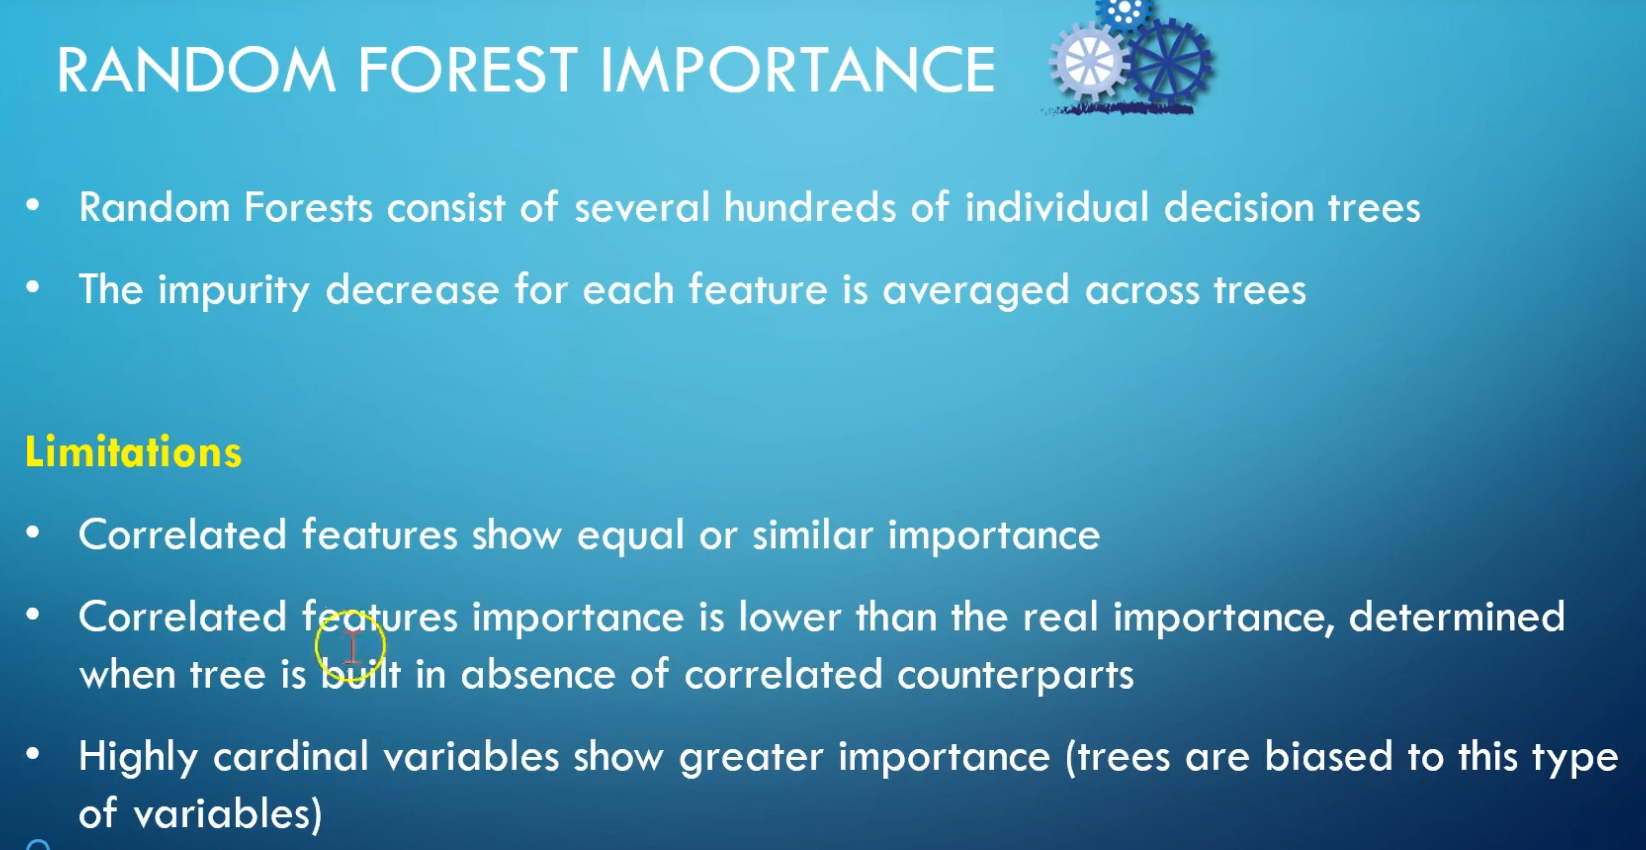

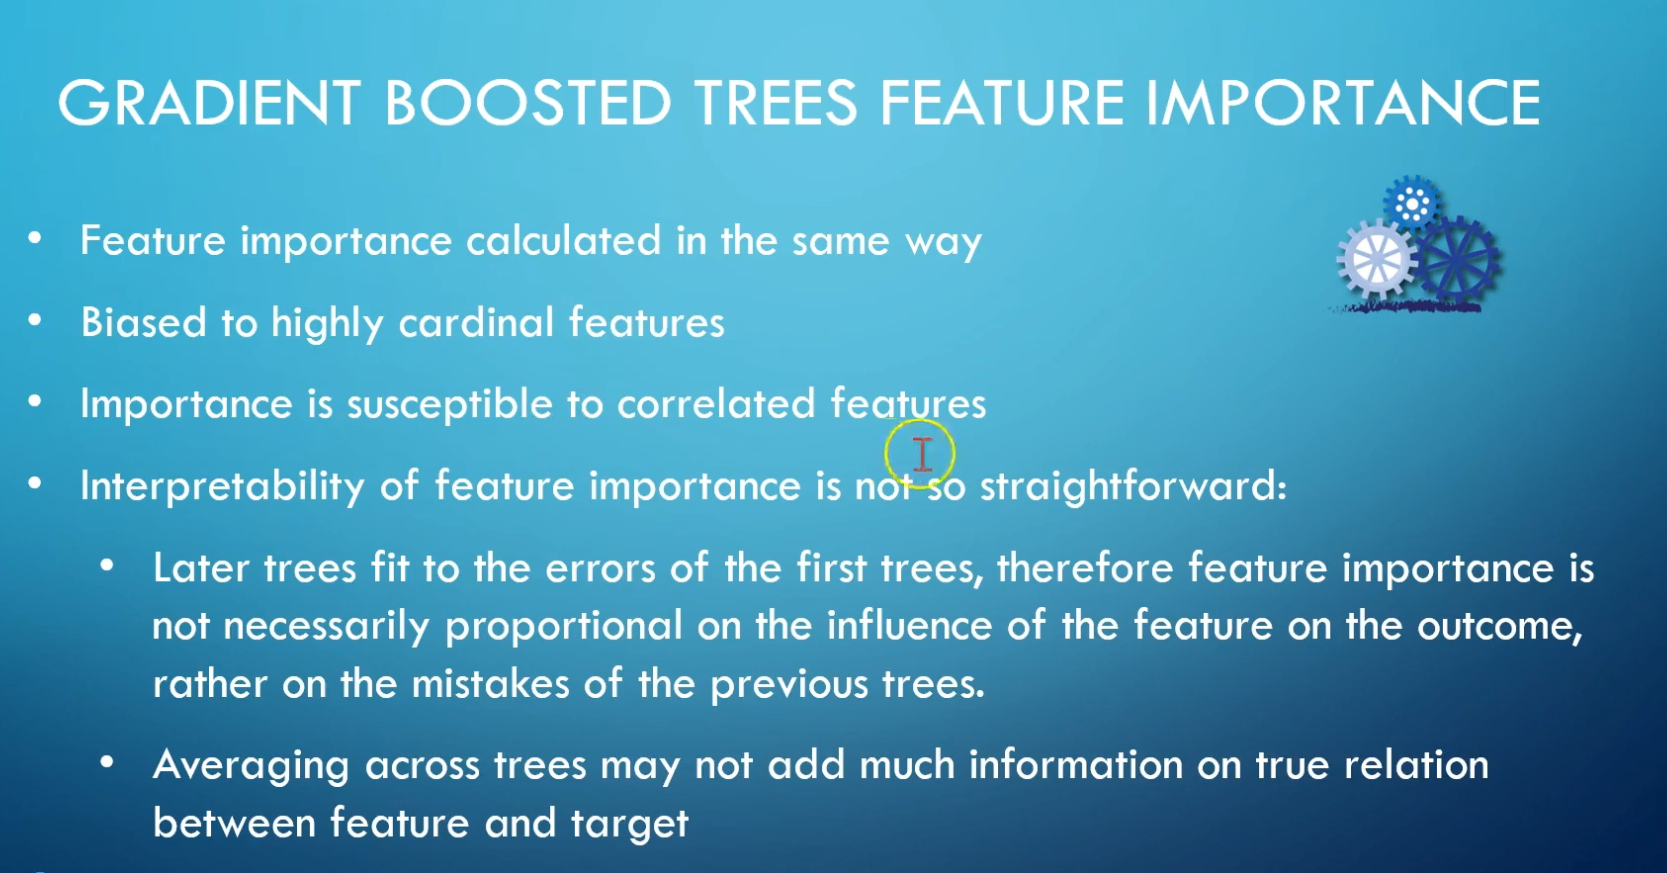

In [2]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [ ]:
# load dataset
data = pd.read_csv('../dataset_2.csv')
data.shape

In [ ]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

### Select features with tree importance

In [ ]:
# we fit Random Forests and select features in 2 lines of code

# first I specify the Random Forest instance and its parameters

# Then I use the selectFromModel class from sklearn
# to automatically select the features

# SelectFrom model will select those features which importance
# is greater than the mean importance of all the features
# by default, but you can alter this threshold if you want to

sel_ = SelectFromModel(RandomForestClassifier(n_estimators=10, random_state=10))

sel_.fit(X_train, y_train)

In [ ]:
sel_.get_support()

In [ ]:
# let's make a list and count the selected features

selected_feat = X_train.columns[(sel_.get_support())]

len(selected_feat)

In [ ]:
# and now let's plot the distribution of importances

pd.Series(sel_.estimator_.feature_importances_.ravel()).hist(bins=20)
plt.xlabel('Feature importance')
plt.ylabel('Number of Features')
plt.show()

In [ ]:
# and now, let's compare the  amount of selected features
# with the amount of features which importance is above the
# mean of all features, to make sure we understand the output of
# SelectFromModel

print('total features: {}'.format((X_train.shape[1])))

print('selected features: {}'.format(len(selected_feat)))

print(
    'features with importance greater than the mean importance of all features: {}'.format(
        np.sum(sel_.estimator_.feature_importances_ >
               sel_.estimator_.feature_importances_.mean())))

# Regression 

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score

In [ ]:
# load dataset
data = pd.read_csv('../dataset_2.csv')
data.shape

In [ ]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

### Select features recursively

In [ ]:
# we do model training and feature selection in 2 lines of code

# first I specify the Random Forest and its parameters

# Then RFE from sklearn to remove features recursively

# RFE will remove one feature at each iteration => the least  important.
# then it will build another random forest and repeat
# till a criteria is met.

# in sklearn the criteria to stop is an arbitrary number
# of features to select, that we need to decide before hand
# not the best solution, but a solution

sel_ = RFE(RandomForestClassifier(n_estimators=10, random_state=10), n_features_to_select=27)
sel_.fit(X_train, y_train)

In [ ]:
# selected features

selected_feat = X_train.columns[(sel_.get_support())]
len(selected_feat)

In [ ]:
# let's display the list of features
selected_feat

In [ ]:
# these are the features selected in the previous
# notebook where we used SelectFromModel from sklearn
# without doing it recursively

previous_lecture_selected_features = [
    'var_1', 'var_2', 'var_6', 'var_9', 'var_13', 'var_15', 'var_16', 'var_17',
    'var_20', 'var_21', 'var_30', 'var_34', 'var_37', 'var_55', 'var_60',
    'var_67', 'var_69', 'var_70', 'var_71', 'var_82', 'var_87', 'var_88',
    'var_95', 'var_96', 'var_99', 'var_103', 'var_108'
]

In [ ]:
# create a function to build random forests and compare
# their performance in train and test sets

def run_randomForests(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [ ]:
# features selected recursively
run_randomForests(X_train[selected_feat],
                  X_test[selected_feat],
                  y_train, y_test)

In [ ]:
# features selected altogether
run_randomForests(X_train[previous_lecture_selected_features],
                  X_test[previous_lecture_selected_features],
                  y_train, y_test)